In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load the dataset
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
data.target_names

['MedHouseVal']

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['price'] = data.target

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot: xlabel='target', ylabel='Count'>

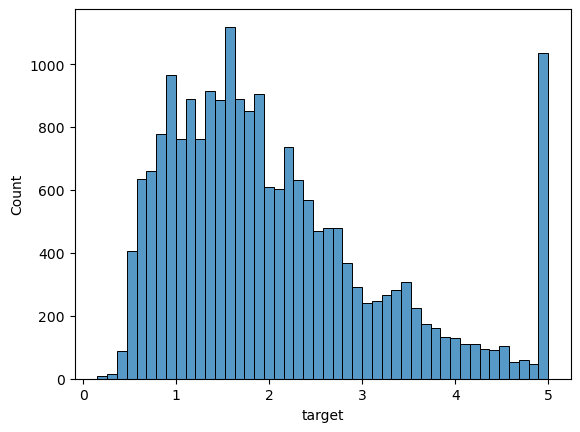

In [15]:
sns.histplot(df['target'])

<AxesSubplot: >

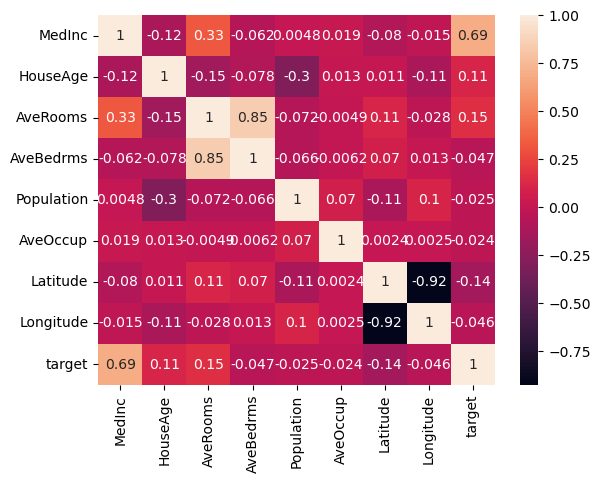

In [17]:
sns.heatmap(df.corr(), annot= True)

In [20]:
X = df.drop('target', axis= 1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=111)

In [21]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5404,3.6250,37.0,5.325893,0.915179,488.0,2.178571,34.03,-118.44
18230,3.4375,17.0,4.155556,1.022222,412.0,2.288889,37.40,-122.09
5880,2.4730,44.0,5.298630,1.027397,750.0,2.054795,34.17,-118.33
15176,4.3424,10.0,5.669136,1.111111,818.0,2.019753,33.03,-117.08
11933,2.2222,35.0,5.624521,1.141762,1168.0,4.475096,33.93,-117.40
...,...,...,...,...,...,...,...,...
7443,2.6354,40.0,3.352740,1.013699,934.0,3.198630,33.96,-118.19
4182,4.6528,47.0,4.335821,0.876866,781.0,2.914179,34.13,-118.23
4820,1.2786,39.0,2.140086,1.090517,1765.0,3.803879,34.05,-118.30
10196,4.6964,35.0,5.613636,1.031818,875.0,3.977273,33.86,-117.94


In [22]:
y_train

5404     3.576
18230    2.906
5880     2.518
15176    1.606
11933    0.813
         ...  
7443     1.518
4182     2.444
4820     1.219
10196    1.831
12116    1.633
Name: target, Length: 14448, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.12342552,  0.66916738, -0.0421824 , ..., -0.07800702,
        -0.74701454,  0.55867879],
       [-0.22302269, -0.91577202, -0.53935866, ..., -0.06856211,
         0.82862593, -1.25640706],
       [-0.73535053,  1.22389617, -0.053764  , ..., -0.08860428,
        -0.68155767,  0.61338001],
       ...,
       [-1.36979779,  0.82766132, -1.39555926, ...,  0.06114493,
        -0.73766356,  0.62829853],
       [ 0.445686  ,  0.51067344,  0.08005522, ...,  0.07599014,
        -0.82649789,  0.80732069],
       [ 0.74134352, -1.86673566,  0.70872636, ...,  0.03803928,
        -0.77974298,  1.16039219]])

In [26]:
## model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.coef_

array([ 0.84405021,  0.11942473, -0.28506294,  0.30422239, -0.01098394,
       -0.0455725 , -0.86475006, -0.83941019])

In [31]:
model.intercept_

2.0620873906422976

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([1.50491075, 0.91997953, 1.90767871, ..., 1.20671004, 2.26203172,
       2.10631671])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score

In [35]:
mean_squared_error(y_test, y_pred)

0.537930875598171

In [36]:
mean_absolute_error(y_test, y_pred)

0.5334730079575717

In [37]:
r2_score(y_test, y_pred)

0.6004037738594415

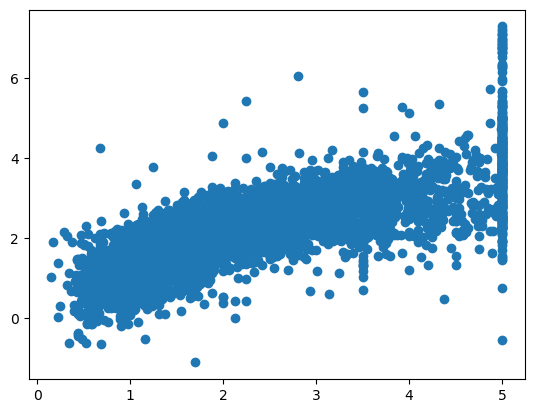

In [38]:
## Assumptions
plt.scatter(y_test, y_pred)

In [39]:
err = y_test - y_pred

/tmp/ipykernel_77/820799601.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(err)


<AxesSubplot: xlabel='target', ylabel='Density'>

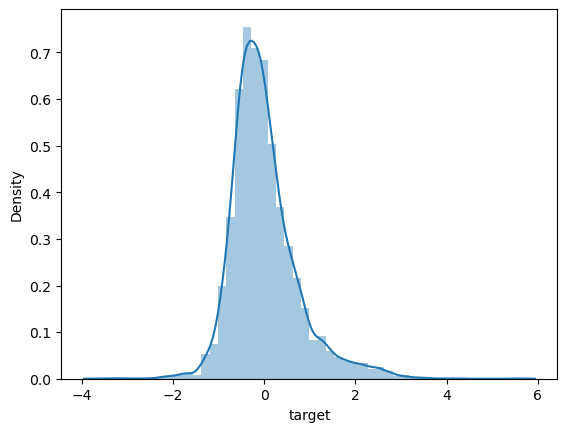

In [41]:
sns.distplot(err)

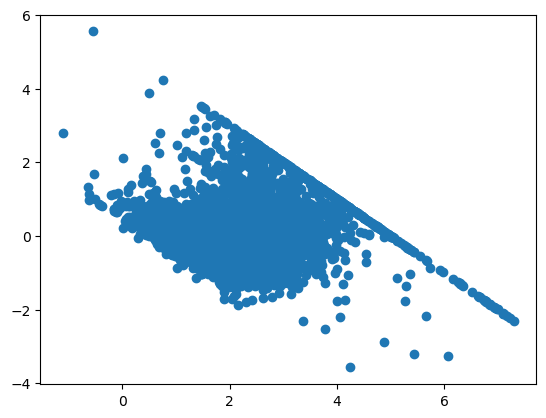

In [42]:
plt.scatter(y_pred, err)

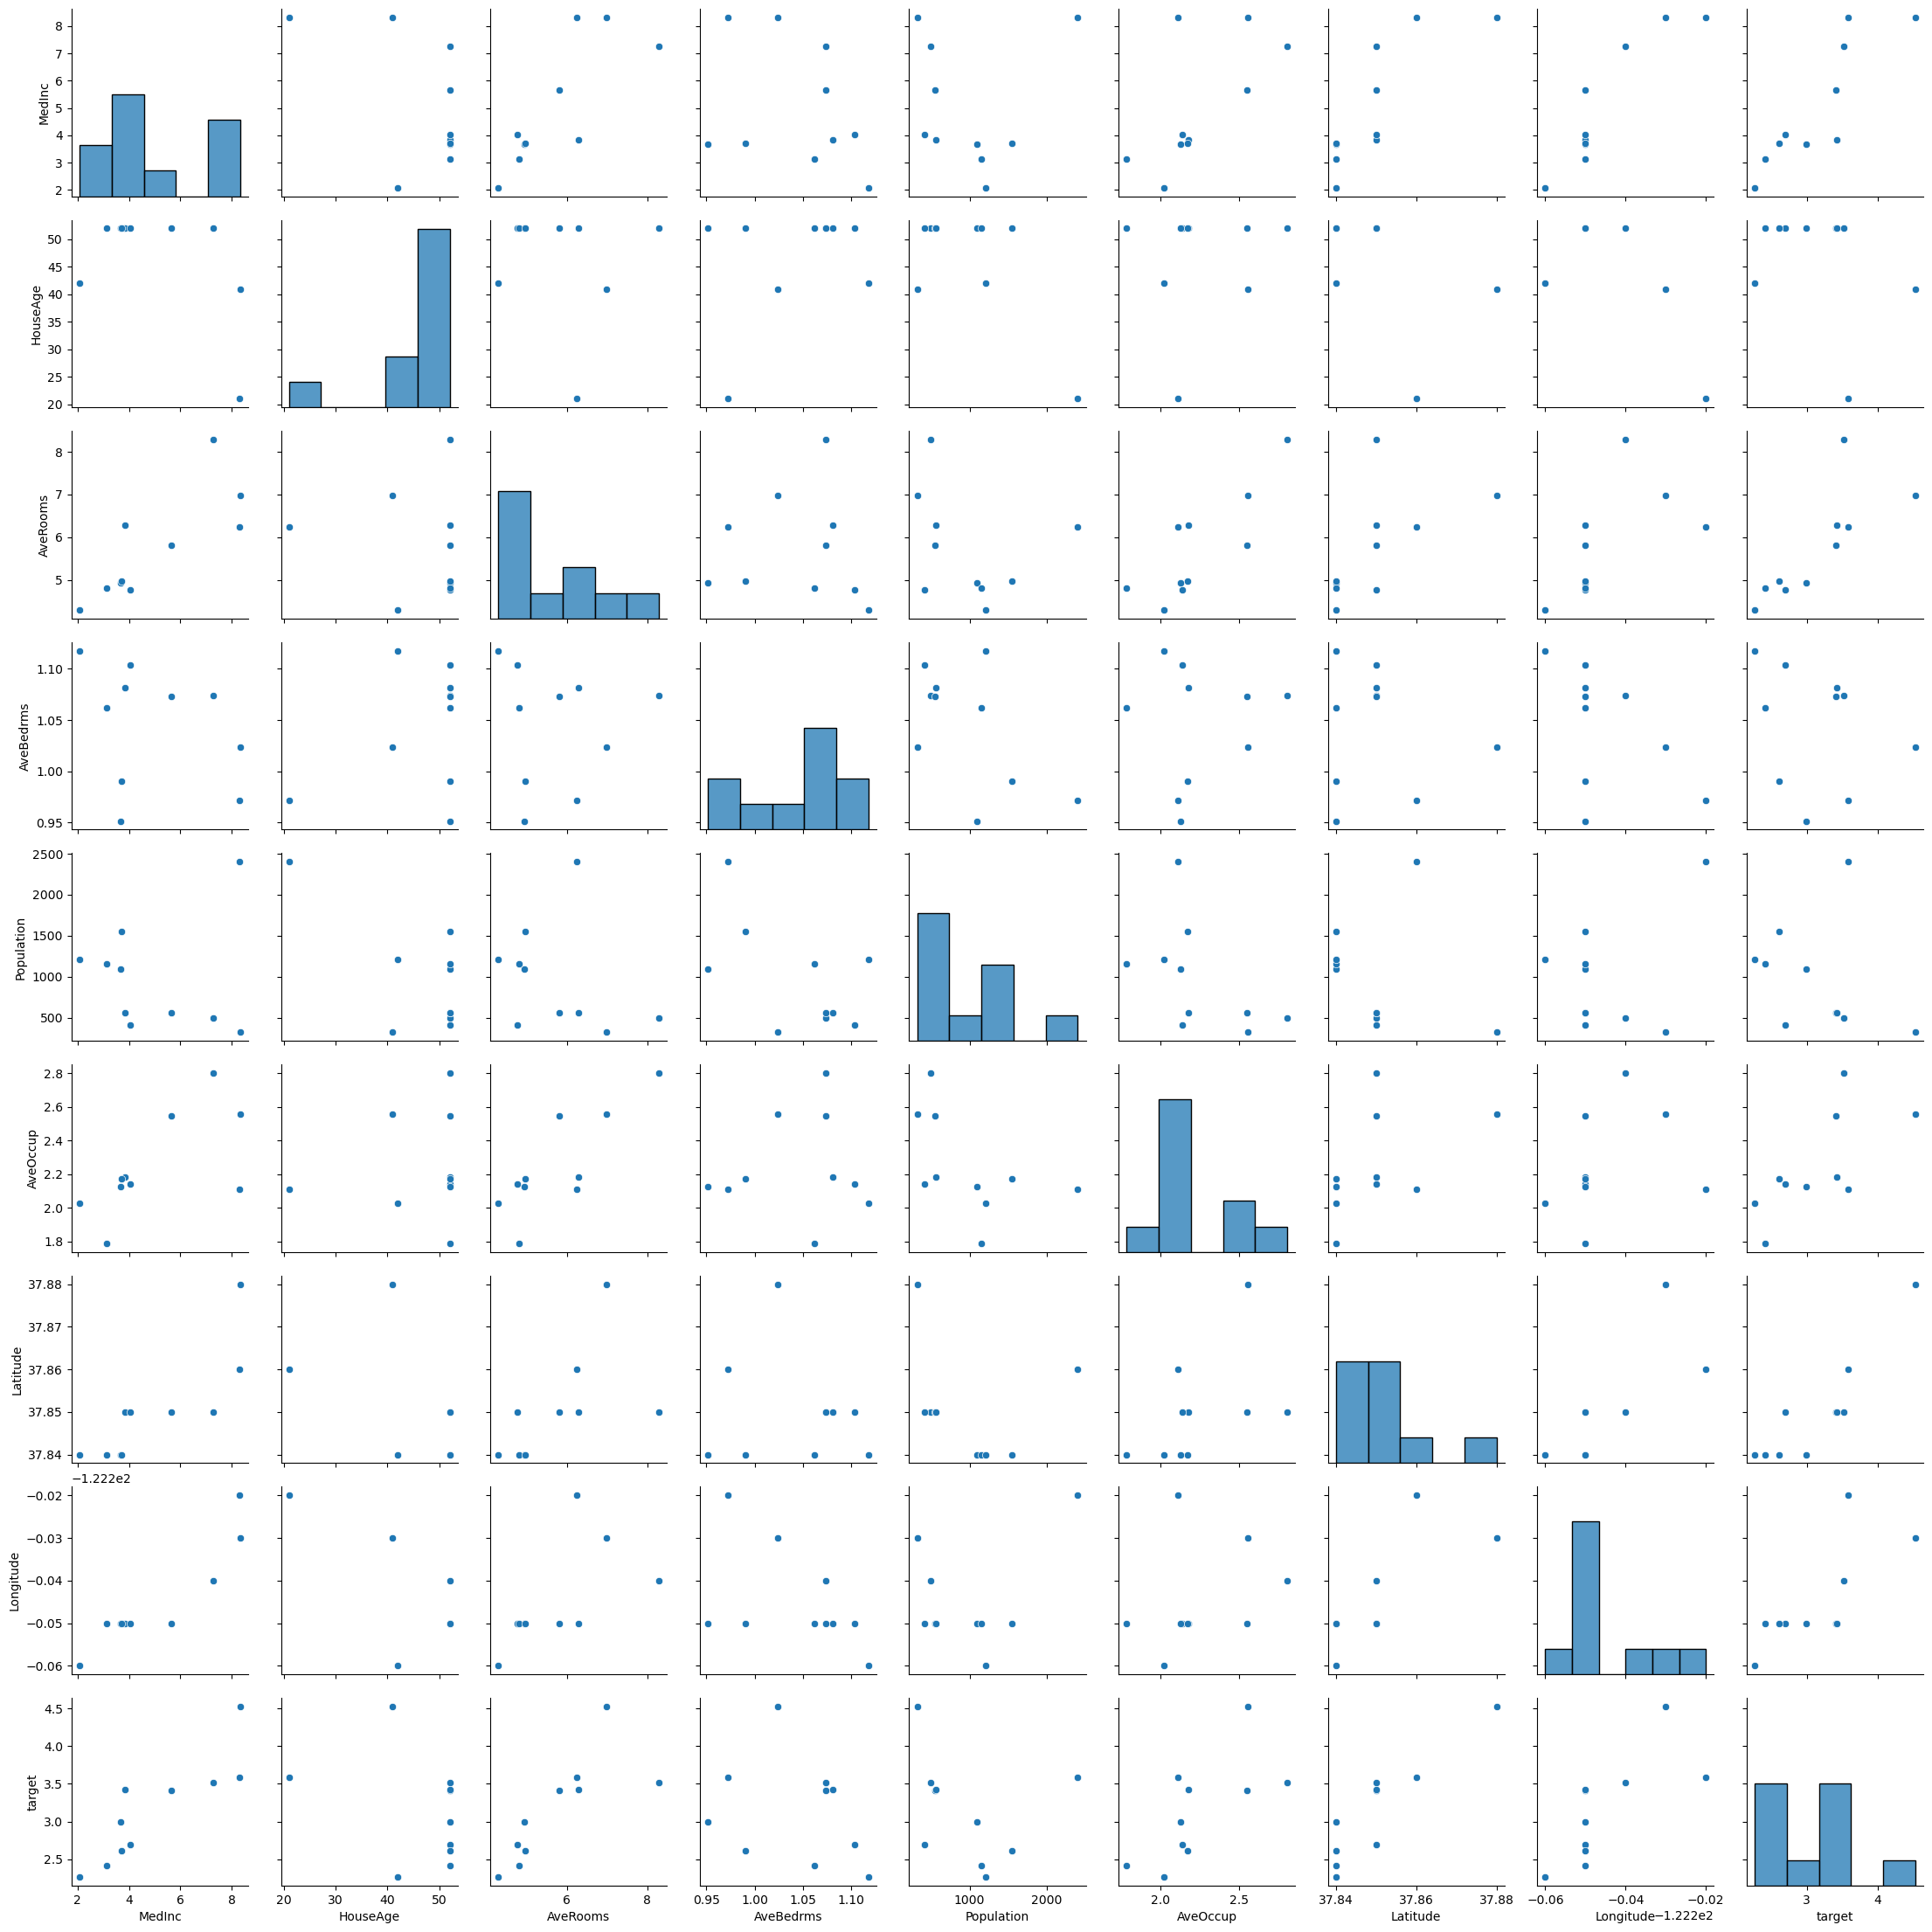

In [43]:
sns.pairplot(df.iloc[0:10])